# Lenet-5

LeNet은 CNN을 처음으로 개발한 얀 르쿤(Yann Lecun) 연구팀이 1998년에 개발한 CNN 알고리즘의 이름이다. original 논문 제목은 "Gradient-based learning applied to document recognition"이다.

참고 : https://bskyvision.com/418


네트워크를 보면,

<img src = 'https://t1.daumcdn.net/cfile/tistory/99170D4C5C7E21250E'>


그림1에서 볼 수 있듯이 LeNet-5는 인풋, 3개의 컨볼루션 레이어(C1, C3, C5), 2개의 서브샘플링 레이어(S2, S4), 1층의 full-connected 레이어(F6), 아웃풋 레이어로 구성되어 있다. 참고로 C1부터 F6까지 활성화 함수로 tanh을 사용한다.   

1)  C1 레이어: 입력 영상(여기서는 32 x 32 사이즈의 이미지)을 6개의 5 x 5 필터와 컨볼루션 연산을 해준다. 그 결과 6장의 28 x 28 특성 맵을 얻게 된다. 


2) S2 레이어: 6장의 28 x 28 특성 맵에 대해 서브샘플링을 진행한다. 결과적으로 28 x 28 사이즈의 특성 맵이 14 x 14 사이즈의 특성맵으로 축소된다. 2 x 2 필터를 stride 2로 설정해서 서브샘플링해주기 때문이다. 사용하는 서브샘플링 방법은 평균 풀링(average pooling)이다. 



평균풀링인데 왜 훈련해야할 파라미터가 필요한지 의아할 수 있는데, original 논문에 의하면 평균을 낸 후에 한 개의 훈련가능한 가중치(trainable weight)를 곱해주고 또 한 개의 훈련가능한 바이어스(trainable bias)를 더해준다고 한다. 그 값이 시그모이드 함수를 통해 활성화된다. 참고로 그 가중치와 바이어스는 시그모이드의 비활성도를 조절해준다고 한다. 

# AlexNet

AlexNet의 기본구조는 LeNet-5와 크게 다르지 않다. 2개의 GPU로 병렬연산을 수행하기 위해서 병렬적인 구조로 설계되었다는 점이 가장 큰 변화이다. AlexNet의 구조도를 살펴보자

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Ft1.daumcdn.net%2Fcfile%2Ftistory%2F99FEB93C5C80B5192E'>

AlexNet은 8개의 레이어로 구성되어 있다. 5개의 컨볼루션 레이어와 3개의 full-connected 레이어로 구성되어 있다. 두번째, 네번째, 다섯번째 컨볼루션 레이어들은 전 단계의 같은 채널의 특성맵들과만 연결되어 있는 반면, 세번째 컨볼루션 레이어는 전 단계의 두 채널의 특성맵들과 모두 연결되어 있다.

이제 각 레이어마다 어떤 작업이 수행되는지 살펴보자. 우선 AlexNet에 입력 되는 것은 227 x 227 x 3 이미지다. (227 x 227 사이즈의 RGB 컬러 이미지를 뜻한다.) 그림에는 224로 되어 있는데 잘못된 겁니다. 

# VGG-16/19

VGGNet은 16개 또는 19개의 층으로 구성된 모델을 의미한다(VGG16, VGG19로 불림). 이전에 포스팅한 VGG-F, VGG-M, VGG-S와는 차이가 있다. 그 모델들은 8개의 층을 가진 AlexNet과 유사한 모델들이다. 하지만 AlexNet와 같이 병렬적 구조로 이뤄지진 않았다. 

 - 역사적으로 봤을 때 VGGNet 모델부터 시작해서 네트워크의 깊이가 확 깊어졌다. 아래 그림을 참고하자. 

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FdrYEZ4%2FbtqwpSXYd8U%2FLF8RkIhWpAmsgR67nfnZsk%2Fimg.png'>

VGGNet은 사용하기 쉬운 구조와 좋은 성능 덕분에 그 대회에서 우승을 거둔 조금 더 복잡한 형태의 GoogLeNet보다 더 인기를 얻었다. 

개인적으로 나는 모든 필터 커널의 사이즈를 3 x 3으로 설정했기 때문에 네트워크의 깊이를 깊게 만들 수 있다고 생각한다. 왜냐하면 필터커널의 사이즈가 크면 그만큼 이미지의 사이즈가 금방 축소되기 때문에 네트워크의 깊이를 충분히 깊게 만들기 불가능하기 때문이다. 

<img src= 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fb1Vk5P%2FbtqwqjujKsa%2FTL2HyQ4kj6pNPz4TsirknK%2Fimg.png'>

그것은 바로 3 x 3 필터로 두 차례 컨볼루션을 하는 것과 5 x 5 필터로 한 번 컨볼루션을 하는 것이 결과적으로 동일한 사이즈의 특성맵을 산출한다는 것이다(아래 그림 참고). 3 x 3 필터로 세 차례 컨볼루션 하는 것은 7 x 7 필터로 한 번 컨볼루션 하는 것과 대응된다.

<img src ='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FT5kb2%2FbtqwonLQrNm%2Fd56nskDXEYoCWRDpxxkeAK%2Fimg.png'>

그러면 3 x 3 필터로 세 차례 컨볼루션을 하는 것이 7 x 7 필터로 한 번 컨볼루션하는 것보다 나은 점은 무엇일까? 일단 가중치 또는 파라미터의 갯수의 차이다. 3 x 3 필터가 3개면 총 27개의 가중치를 갖는다. 반면 7 x 7 필터는 49개의 가중치를 갖는다. CNN에서 가중치는 모두 훈련이 필요한 것들이므로, 가중치가 적다는 것은 그만큼 훈련시켜야할 것의 갯수가 작아진다. 따라서 학습의 속도가 빨라진다. 동시에 층의 갯수가 늘어나면서 특성에 비선형성을 더 증가시키기 때문에 특성이 점점 더 유용해진다. 

 

## VGG 구조
<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FK990l%2FbtqwDJ7C54R%2F664Ksm6gyTGBR1wK3YPDFk%2Fimg.png'>

# GoogleNet


- GoogLeNet은 2014년 이미지넷 이미지 인식 대회(ILSVRC)에서 VGGNet(VGG19)을 이기고 우승을 차지한 알고리즘이다. GoogLeNet은 19층의 VGG19보다 좀 더 깊은 22층으로 구성되어 있다. GoogLeNet의 original 논문은 Christian Szegedy 등에 의해 2015 CVPR에 개제된 "Going Deeper with Convolutions"이다. GoogLeNet이란 이름에서 알 수 있듯이 구글이 이 알고리즘 개발에 참여했다. 

## GoogleNet의 구조

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FIq9NO%2FbtqyPWk5PBX%2FK2JicGjIjj5w0eFIbhx4bK%2Fimg.png'>

### 1X1 컨볼루션

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FMzPze%2FbtqyQy5e3NM%2F5HPtmAwVQzKJTj6wgWautk%2Fimg.png'>

1 x 1 컨볼루션은 어떤 의미를 갖는 것일까? 왜 해주는 것일까? GoogLeNet에서 1 x 1 컨볼루션은 특성맵의 갯수를 줄이는 목적으로 사용된다. 특성맵의 갯수가 줄어들면 그만큼 연산량이 줄어든다.

 

예를 들어, 480장의 14 x 14 사이즈의 특성맵(14 x 14 x 480)이 있다고 가정해보자. 이것을 48개의 5 x 5 x 480의 필터커널로 컨볼루션을 해주면 48장의 14 x 14의 특성맵(14 x 14 x 48)이 생성된다. (zero padding을 2로, 컨볼루션 보폭은 1로 설정했다고 가정했다.) 이때 필요한 연산횟수는 얼마나 될까? 바로 (14 x 14 x 48) x (5 x 5 x 480) = 약 112.9M이 된다. 

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fbt4AxN%2FbtqyQ6NHO6u%2FezqfgBmWfkN5N2C49icbR1%2Fimg.png'>


### Inception 모듈

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbHZHKC%2FbtqyQ5aekdF%2F3rkScmoIxS4P4fia96lQwk%2Fimg.png'>


GoogLeNet은 총 9개의 인셉션 모듈을 포함하고 있다. 인셉션 모듈을 하나 확대해서 자세히 살펴보자. 

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2F14Um2%2FbtqyQ5nKlEA%2FhjSsZaYiBukseySytXWFCK%2Fimg.png'>

GoogLeNet에 실제로 사용된 모듈은 1x1 컨볼루션이 포함된 (b) 모델이다. 아까 살펴봤듯이 1x1 컨볼루션은 특성맵의 장수를 줄여주는 역할을 한다. 노란색 블럭으로 표현된 1x1 컨볼루션을 제외한 나이브(naive) 버전을 살펴보면, 이전 층에서 생성된 특성맵을 1x1 컨볼루션, 3x3 컨볼루션, 5x5 컨볼루션, 3x3 최대풀링해준 결과 얻은 특성맵들을 모두 함께 쌓아준다. AlexNet, VGGNet 등의 이전 CNN 모델들은 한 층에서 동일한 사이즈의 필터커널을 이용해서 컨볼루션을 해줬던 것과 차이가 있다. 따라서 좀 더 다양한 종류의 특성이 도출된다. 여기에 1x1 컨볼루션이 포함되었으니 당연히 연산량은 많이 줄어들었을 것이다. 

### Global average Pooling

AlexNet, VGGNet 등에서는 fully connected (FC) 층들이 망의 후반부에 연결되어 있다. 그러나 GoogLeNet은 FC 방식 대신에 global average pooling이란 방식을 사용한다. global average pooling은 전 층에서 산출된 특성맵들을 각각 평균낸 것을 이어서 1차원 벡터를 만들어주는 것이다. 1차원 벡터를 만들어줘야 최종적으로 이미지 분류를 위한 softmax 층을 연결해줄 수 있기 때문이다. 만약 전 층에서 1024장의 7 x 7의 특성맵이 생성되었다면, 1024장의 7 x 7 특성맵 각각 평균내주어 얻은 1024개의 값을 하나의 벡터로 연결해주는 것이다.

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbwTHh0%2FbtqB2uyArWI%2FqBr48Ik8bl4bK1oOEJa3bk%2Fimg.png'>

이렇게 해줌으로 얻을 수 있는 장점은 가중치의 갯수를 상당히 많이 없애준다는 것이다. 만약 FC 방식을 사용한다면 훈련이 필요한 가중치의 갯수가 7 x 7 x 1024 x 1024 = 51.3M이지만 global average pooling을 사용하면 가중치가 단 한개도 필요하지 않다. 

### auxiliary classifier

네트워크의 깊이가 깊어지면 깊어질수록 vanishing gradient 문제를 피하기 어려워진다. 그러니까 가중치를 훈련하는 과정에 역전파(back propagation)를 주로 활용하는데, 역전파과정에서 가중치를 업데이트하는데 사용되는 gradient가 점점 작아져서 0이 되어버리는 것이다. 따라서 네트워크 내의 가중치들이 제대로 훈련되지 않는다. 이 문제를 극복하기 위해서 GoogLeNet에서는 네트워크 중간에 두 개의 보조 분류기(auxiliary classifier)를 달아주었다. 

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbD5poT%2FbtqyQM98EkX%2FnbxasUSmCO1WnaIyIsvUD0%2Fimg.png'>

<img rc = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fb1Vk5P%2FbtqwqjujKsa%2FTL2HyQ4kj6pNPz4TsirknK%2Fimg.png'>

# 합성곱 맛보기 

## Fashion MNIST

VGG16 ->19 -> Resnet

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

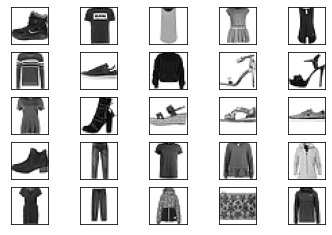

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i],cmap = plt.cm.binary) 

In [ ]:
#심층 신경망을 이용한 모델 생성 및 훈련

x_train,x_test = x_train/255.0, x_test/255.0

In [ ]:

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape = (28,28)),
                                    tf.keras.layers.Dense(128, activation = 'PReLU'),
                                    tf.keras.layers.Dropout(0.5),
                                    tf.keras.layers.Dense(10, activation = 'Softmax')
                                                            
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100608    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,898
Trainable params: 101,898
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

model.fit(x_train,y_train, epochs=10)
model.evaluate(x_test,y_test,verbose = 2)

Epoch 1/10
1875/1875 [==============================] - 7s 2ms/step - loss: 0.6098 - acc: 0.7816
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4667 - acc: 0.8303
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4347 - acc: 0.8420
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4148 - acc: 0.8493
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3979 - acc: 0.8556
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3884 - acc: 0.8575
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3809 - acc: 0.8612
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3726 - acc: 0.8629
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3663 - acc: 0.8643
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3580 - acc: 0.8692
313/313 - 1s - loss: 0.3594 -

[0.3594483435153961, 0.8736000061035156]

# 데이터 전처리

In [ ]:
X_train_final = x_train.reshape((-1,28,28,1))/255.0
X_test_final = x_test.reshape((-1,28,28,1))/255.0

In [ ]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32,(3,3),padding = 'same',activation = 'relu', input_shape=(28,28,1)),
                                    tf.keras.layers.MaxPool2D((2,2), strides=2),
                                    tf.keras.layers.Conv2D(32,(3,3),padding = 'same',activation = 'relu'),
                                    tf.keras.layers.MaxPool2D((2,2), strides=2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(128,activation = 'relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')                                                           
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               200832    
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['acc'])

In [ ]:
model.fit(X_train_final,y_train,epochs = 10)
model.evaluate(X_test_final,y_test)

Epoch 1/10
1875/1875 [==============================] - 33s 3ms/step - loss: 0.8993 - acc: 0.6647
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5875 - acc: 0.7839
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5327 - acc: 0.8048
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4938 - acc: 0.8208
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4632 - acc: 0.8320
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4345 - acc: 0.8431
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4145 - acc: 0.8495
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3974 - acc: 0.8557
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3839 - acc: 0.8601
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.4020 - acc: 0.8603


[0.40197059512138367, 0.8603000044822693]

# Resnet(Deep Residual Learning for Image Recognition)

- . 2014년의 GoogLeNet이 22개 층으로 구성된 것에 비해, ResNet은 152개 층을 갖는다. 약 7배나 깊어졌다! 

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fcx1l7G%2FbtqzR2RurjQ%2FuRBKXJoxhDZdBjqI2BqWnK%2Fimg.png'>

## Resnet의 결과

<img src ='https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FuiYxJ%2FbtqzU9uR8kC%2FzQi10LVKdbdcwAs1XOhqAk%2Fimg.png'>

위 그래프들을 보면 오히려 더 깊은 구조를 갖는 56층의 네트워크가 20층의 네트워크보다 더 나쁜 성능을 보임을 알 수 있다. 기존의 방식으로는 망을 무조건 깊게 한다고 능사가 아니라는 것을 확인한 것이다. 뭔가 새로운 방법이 있어야 망을 깊게 만드는 효과를 볼 수 있다는 것을 ResNet의 저자들은 깨달았다. 

### Residual Block

그것이 바로 ResNet의 핵심인 Residual Block의 출현을 가능케 했다. 아래 그림에서 오른쪽이 Residual Block을 나타낸다. 기존의 망과 차이가 있다면 입력값을 출력값에 더해줄 수 있도록 지름길(shortcut)을 하나 만들어준 것 뿐이다. 

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbFPOry%2FbtqzR2En9ry%2F2DTETgT1BkCrW74hKQCsrk%2Fimg.png'>

기존의 신경망은 입력값 x를 타겟값 y로 매핑하는 함수 H(x)를 얻는 것이 목적이었다. 그러나 ResNet은 F(x) + x를 최소화하는 것을 목적으로 한다. x는 현시점에서 변할 수 없는 값이므로 F(x)를 0에 가깝게 만드는 것이 목적이 된다. F(x)가 0이 되면 출력과 입력이 모두 x로 같아지게 된다. F(x) = H(x) - x이므로 F(x)를 최소로 해준다는 것은 H(x) - x를 최소로 해주는 것과 동일한 의미를 지닌다. 여기서 H(x) - x를 잔차(residual)라고 한다. 즉, 잔차를 최소로 해주는 것이므로 ResNet이란 이름이 붙게 된다. 

### Resnet의 구조
ResNet은 기본적으로 VGG-19의 구조를 뼈대로 한다. 거기에 컨볼루션 층들을 추가해서 깊게 만든 후에, shortcut들을 추가하는 것이 사실상 전부다.

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbdQ7nn%2FbtqzVCKyKVV%2F5nkGhNvCqK9BcIgasYRxH0%2Fimg.jpg'>



#### Resnet의 구조

<img src = 'https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FzwdXd%2FbtqzVoeJwoE%2F9oMcs2Qkj5m07pKPHRmeK0%2Fimg.png'>

# 전이 학습 사용!

### pretrained model

<img src = 'https://www.researchgate.net/profile/Seunghyoung-Ryu/publication/329954455/figure/fig1/AS:725290594623488@1549934161033/The-structure-of-ResNet-12.png'>


<img src = 'https://neurohive.io/wp-content/uploads/2019/01/resnet-e1548261477164.png'>

GAP 참고 :https://gaussian37.github.io/dl-concept-global_average_pooling/

<img src = 'https://paperswithcode.com/media/methods/Screen_Shot_2020-09-25_at_10.26.40_AM_SAB79fQ.png'>

In [ ]:
import keras
import numpy as np
import matplotlib.pyplot as plt
###################keras model##############################################
from keras.layers import Dense, Conv2D,BatchNormalization, Activation
from keras.layers import MaxPool2D, AveragePooling2D, Input, Flatten
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing import image_dataset_from_directory 
from keras.regularizers import l2
from keras.models import Model
import tensorflow as tf

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

In [ ]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

In [ ]:
epochs = 10
batch_size = 100
data_augemenation = False
img_size = 28

num_classes = 10
num_filters = 64
num_blocks = 4
num_sub_blocks = 2
use_max_pool = False

In [ ]:
import tensorflow as tf
#Converting labels to ont-hot vectors
y_train = tf.keras.utils.to_categorical(y_train,num_classes)
y_test = tf.keras.utils.to_categorical(y_test,num_classes )

In [ ]:
#modeling

inputs = Input(shape =(28,28,1))
x = Conv2D(num_filters, padding = 'same', kernel_initializer = 'he_normal', kernel_size=7, strides = 2,
           kernel_regularizer = l2(1e-4))(inputs)

x = BatchNormalization()(x)
x = Activation('relu')(x)

if use_max_pool:
  x = MaxPool2D(pool_size=3, padding = 'same', stride = 2)(x)
  num_blocks = 3

# CNN Resnet
for i in range(num_blocks):
  for j in range(num_sub_blocks):
    strides = 1
    is_first_layer_but_not_first_block=j==0 and i>0
    if is_first_layer_but_not_first_block:
      strides = 2
    # Residual block
    y = Conv2D(num_filters,
               kernel_size = 3, 
               padding = 'same', 
               strides = strides,
               kernel_initializer = 'he_normal',
              kernel_regularizer = l2(1e-4))(x)
    y = BatchNormalization()(y)
    y = Activation('relu')(y)
    y = Conv2D(num_filters,
               kernel_size = 3, 
               padding = 'same', 
               kernel_initializer = 'he_normal',
               kernel_regularizer= l2(1e-4))(y)
    y = BatchNormalization()(y)
    if is_first_layer_but_not_first_block:
      x =  Conv2D(num_filters,
               kernel_size = 3, 
               padding = 'same', 
               strides = 2,
               kernel_initializer = 'he_normal',
               kernel_regularizer= l2(1e-4))(x)
    
    x = keras.layers.add([x,y])
    x = Activation('relu')(x)

  num_filter = 2 * num_filters

#classifier 
x = AveragePooling2D()(x)
y = Flatten()(x)

outputs = Dense(num_classes, activation='softmax', kernel_initializer='he_normal')(y)

model = Model(inputs = inputs, outputs = outputs)
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(),
              metrics = ['acc'])
model.summary()

      


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 14, 14, 64)   3200        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 14, 14, 64)   256         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 14, 14, 64)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
import os
save_dir = os.path.join(os.getcwd(),'save_model')
model_name = 'fmnist_resnt_model.h5'
if not os.path.join(save_dir):
  os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)
print(filepath)

/content/save_model/fmnist_resnt_model.h5


In [ ]:
checkpoint = ModelCheckpoint(filepath=filepath,
                             verbose = 1,
                             save_best_only = True)
callbacks = [checkpoint]

In [ ]:
model.fit(x_train,y_train, 
          batch_size = batch_size,
          epochs = epochs,
          validation_data = (x_test,y_test),
          shuffle = True,
          callbacks = callbacks)

Epoch 1/10
600/600 [==============================] - 31s 21ms/step - loss: 0.8424 - acc: 0.7966 - val_loss: 0.5883 - val_acc: 0.8657

Epoch 00001: val_loss improved from inf to 0.58832, saving model to /content/save_model/fmnist_resnt_model.h5


/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/10
600/600 [==============================] - 11s 18ms/step - loss: 0.5116 - acc: 0.8969 - val_loss: 0.4989 - val_acc: 0.8928

Epoch 00002: val_loss improved from 0.58832 to 0.49893, saving model to /content/save_model/fmnist_resnt_model.h5
Epoch 3/10
600/600 [==============================] - 11s 19ms/step - loss: 0.4469 - acc: 0.9106 - val_loss: 0.4972 - val_acc: 0.8897

Epoch 00003: val_loss improved from 0.49893 to 0.49723, saving model to /content/save_model/fmnist_resnt_model.h5
Epoch 4/10
600/600 [==============================] - 11s 19ms/step - loss: 0.3990 - acc: 0.9206 - val_loss: 0.4840 - val_acc: 0.8923

Epoch 00004: val_loss improved from 0.49723 to 0.48396, saving model to /content/save_model/fmnist_resnt_model.h5
Epoch 5/10
600/600 [==============================] - 11s 19ms/step - loss: 0.3621 - acc: 0.9286 - val_loss: 0.4354 - val_acc: 0.9010

Epoch 00005: val_loss improved from 0.48396 to 0.43542, saving model to /content/save_model/fmnist_resnt_model.h5
Epoc

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Cats and dogs kaggle dataset(https://www.kaggle.com/c/dogs-vs-cats)

In [ ]:
!mkdir -p ~/.kaggle
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
# 본인이 참가한 모든 대회 보기 
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        203           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        339           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        988           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       6203           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      52166            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge      13653            True  
connectx

In [ ]:
!kaggle competitions download -c dogs-vs-cats

train.zip: Skipping, found more recently modified local copy (use --force to force download)
test1.zip: Skipping, found more recently modified local copy (use --force to force download)
sampleSubmission.csv: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import numpy as np
import pandas as pd
import zipfile
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf  

from sklearn.model_selection import train_test_split
from keras.preprocessing.image  import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.applications.resnet50 import preprocess_input

1. Extracting Zip file

In [ ]:
zip_file = glob.glob('/content/*.zip')
print(zip_file)

['/content/test1.zip', '/content/train.zip']


In [ ]:
def extract_zip(file):
  with zipfile.ZipFile(file,'r') as zip_ref:
    zip_ref.extractall('temp')

#extract train and test
for files in zip_file:
  extract_zip(files)

In [ ]:
batch_size = 16
img_size = 224
epochs = 30

In [ ]:
print(len(os.listdir('/content/temp/train')), 'training data') 
print(len(os.listdir('/content/temp/test1')), 'test data')
os.listdir('/content/temp/')

25000 training data
12500 test data


['test1', 'train']

1-2. Data Formatting

In [ ]:
def gen_label(directory):
  label = []
  for file in os.listdir(directory):
    if (file.split('.')[0] == 'dog'):
      label.append(str(1))
    elif (file.split('.')[0] =='cat'):
      label.append(str(0))
  return label
def gen_path(directory):
  path = []
  for files in os.listdir(directory):
    path.append(files)
  return path

y_train = gen_label('/content/temp/train')
X_train = gen_path('/content/temp/train')
X_test = gen_path('/content/temp/test1')

In [ ]:
df = pd.DataFrame({'filename' : X_train,'category':y_train})

print(df.head())

        filename category
0  dog.10694.jpg        1
1  cat.11915.jpg        0
2   dog.4214.jpg        1
3   dog.1140.jpg        1
4   dog.7814.jpg        1


Text(0.5, 1.0, 'Data Distribution')

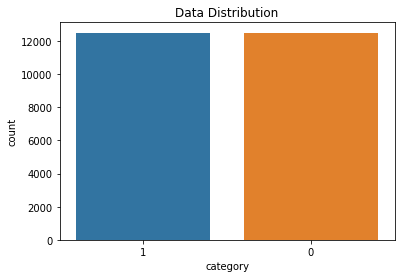

In [ ]:
sns.countplot(x = 'category', data = df).set_title('Data Distribution')

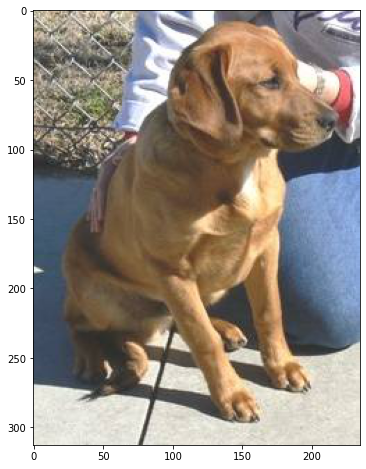

In [ ]:
os.chdir('/content/temp/train')

img = load_img(df['filename'].iloc[600])

plt.figure(figsize=(8,8))
plt.imshow(img)

In [ ]:
df_train,df_valid = train_test_split(df, test_size = 0.25)
print(df_train.shape)
print(df_valid.shape)

(18750, 2)
(6250, 2)


In [ ]:
def generate_train_batch(model):
  if model == 'resnet':
    print('resnet data')  # Specific preprossing method
    train_datagen = ImageDataGenerator(
        rotation_range = 10,
        zoom_range = 0.1,
        horizontal_flip = True,
        fill_mode = 'nearest',
        width_shift_range = 0.1,
        height_shift_range = 0.1,
        preprocess_function = preprocess_input) #preprocess_input : 단일 이미지를 로드하면 하나의 이미지 모양인(size1,size2,channel)를 얻게됨.
        # 이미지 배치를 생성하려면 추가 자원이 필요함-> (sample,size1,size2, channels) / preprcess_input 함수는 모델에 필요한 형식에
        # 이미지를 적절하게 맞추기 위한 것.
  else :  # standard Augmenatation.
    train_datagen = ImageDataGenerator(
        rotation_range = 10,
        rescale = 1./255,
        zoom_range = 0.1,
        horizontal_flip = True,
        fill_mode = 'nearest',
        width_shift_range = 0.1,
        height_shift_range = 0.1)
  if model =='vgg':
    print('vgg data') 
    train_gen = train_datagen.flow_from_dataframe(
        df_train[['filename']],
        x_col = 'filename',
        y_col = None,
        target_size = (img_size, img_size), # 224x224
        class_mode = None,
        shuffle = False
    )
  else : 
    train_gen = train_datagen.flow_from_dataframe(
        df_train,
        x_col = 'filename',
        y_col = 'category',
        target_size = (img_size, img_size), # 224x224
        class_mode = 'binary'
    )
  return train_gen  

def generate_valid_batch(model):
  if model =='resnet':
    print('resnet validation set')
    valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
  else:
    valid_datagen = ImageDataGenerator(rescale=1./255)


  valid_gen = valid_datagen.flow_from_dataframe(
      df_valid,
      x_col = 'filename',
      y_col = 'category',
      target_size = (img_size, img_size),
      batch_size = batch_size,
      class_mode = 'binary'
  )

  return valid_gen  

In [ ]:
train_gen = generate_train_batch('others')
valid_gen = generate_valid_batch('others')

Found 18750 validated image filenames belonging to 2 classes.
Found 6250 validated image filenames belonging to 2 classes.


## Data Augmentation

In [ ]:
#standard
visual_datagen = ImageDataGenerator(
    rotation_range = 10,
    rescale = 1./255,
    zoom_range = 0.1,
    horizontal_flip = True,
    fill_mode = 'nearest',
    width_shift_range = 0.1,
    height_shift_range = 0.1)

Found 1 validated image filenames belonging to 1 classes.


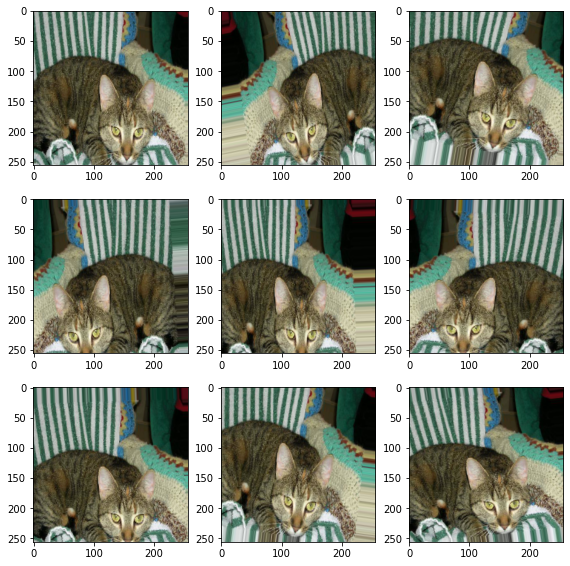

In [ ]:
visualise_df = df_train.sample(n=1).reset_index(drop = True)

visualisation_generator = visual_datagen.flow_from_dataframe(
    visualise_df,
    x_col = 'filename',
    y_col = 'category' 
)
plt.figure(figsize = (8,8))
for i in range(0,9):
  plt.subplot(3,3, i+1)
  for X_batch, y_batch in visualisation_generator:
    image = X_batch[0]
    plt.imshow(image)
    break
plt.tight_layout()
plt.show()

# CNN Architecture

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.layers import *
from keras.models import Model, Sequential
from keras import optimizers,regularizers
from keras import backend as K
import tensorflow as tf

In [ ]:
modelcnn = Sequential()
modelcnn.add(Conv2D(16,(3,3), activation= 'relu', input_shape = (img_size,img_size,3)))
modelcnn.add(Conv2D(16,(3,3),activation = 'relu'))
modelcnn.add(MaxPool2D(2,2))


modelcnn.add(Conv2D(32,(3,3), activation= 'relu'))
modelcnn.add(Conv2D(32,(3,3),activation = 'relu'))
modelcnn.add(MaxPool2D(2,2))


modelcnn.add(Conv2D(64,(3,3), activation= 'relu'))
modelcnn.add(Conv2D(64,(3,3),activation = 'relu'))
modelcnn.add(MaxPool2D(2,2))
modelcnn.add(Dropout(0.2))

modelcnn.add(Conv2D(64,(3,3), activation= 'relu'))
modelcnn.add(MaxPool2D(2,2))

modelcnn.add(Flatten())
modelcnn.add(Dense(512, activation='relu'))
modelcnn.add(Dropout(0.5))
modelcnn.add(Dense(1, activation='sigmoid'))


modelcnn.compile(loss = tf.keras.losses.binary_crossentropy,
                 optimizer = optimizers.Adam(),
                 metrics = ['acc'])
modelcnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 222, 222, 16)      448       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 220, 220, 16)      2320      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 16)      0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 108, 108, 32)      4640      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 106, 106, 32)      9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 51, 51, 64)        1

In [ ]:
modelcnn.fit_generator(train_gen,
                       epochs = epochs,
                       validation_data = valid_gen)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
586/586 [==============================] - 252s 425ms/step - loss: 0.6961 - acc: 0.5048 - val_loss: 0.6879 - val_acc: 0.5357
Epoch 2/30
586/586 [==============================] - 248s 423ms/step - loss: 0.6879 - acc: 0.5350 - val_loss: 0.6618 - val_acc: 0.5776
Epoch 3/30
586/586 [==============================] - 248s 423ms/step - loss: 0.6782 - acc: 0.5726 - val_loss: 0.6430 - val_acc: 0.6413
Epoch 4/30
586/586 [==============================] - 250s 427ms/step - loss: 0.6469 - acc: 0.6325 - val_loss: 0.6194 - val_acc: 0.6424
Epoch 5/30
586/586 [==============================] - 249s 424ms/step - loss: 0.5887 - acc: 0.6900 - val_loss: 0.5086 - val_acc: 0.7408
Epoch 6/30
586/586 [==============================] - 249s 425ms/step - loss: 0.5388 - acc: 0.7314 - val_loss: 0.4890 - val_acc: 0.7547
Epoch 7/30
586/586 [==============================] - 252s 430ms/step - loss: 0.4935 - acc: 0.7674 - val_loss: 0.4253 - val_acc: 0.7997
Epoch 8/30
586/586 [============================

# Transfer learning

전이 학습-> pretrained model 

In [ ]:
vgg = VGG16(weights = 'imagenet',
            include_top = False,
            input_shape = (224,224,3))
for layers in vgg.layers:
  layers.trainable = False

h5 file ->pretrain model 

imagenet ->class 1000개 이미지를 학습한 weight ->.h5

In [ ]:
feature_list = []
for path in df_train['filename'].to_numpy():
  x = load_img(path,target_size = (img_size,img_size))
  img_array = img_to_array(x)
  img_array = np.expand_dims(img_array,axis =0)
  features = vgg.predict(img_array)
  feature_list.append(features)

feat_lst = np.reshape(feature_list, (-1,7*7*512))

In [ ]:
del feature_list

## Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

y = df_train['category'].to_numpy()

X_train,X_test,y_train,y_test = train_test_split(feat_lst, y, test_size = 0.2, random_state = 42)

glm = LogisticRegression(C=0.1)
glm.fit(X_train,y_train)

# Fine Turning-> Resnet +fully Connected

In [ ]:
np.random.seed(2020)

res = ResNet50(weights = 'imagenet',
                      include_top = False,
                      input_shape = (224,224,3))
res_train_gen = generate_train_batch('resnet')
res_valid_gen = generate_valid_batch('resnet')


for layer in res.layer[:171]:
  layer.trainable = False


flat = Flatten()(res.output)
dense = Dense91024,activation = 'relu')(falt)
drop  = Dropout(0.5)(dense)
classifier = Dense(1, activation = 'sigmoid')(drop)

res_model = Model(res.input, classifier)
res_model.compile(loss = tf.keras.losses.binary_crossentropy,
                 optimizer = optimizers.Adam(),
                 metrics = ['acc'])
res_model.summary()

In [ ]:
modelcnn.fit_generator(res_train_gen,
                       epochs = epochs,
                       validation_data = res_valid_gen,
                       validation_steps = res_train_gen.samples // batch_size,
                       step_per_epoch = res_valid_gen.samples // batch_size)

In [ ]:
testdf = pd.DataFrame({'filename':X_test})
test_sample = testdf.sample(n=12, random_state = 2021)

def test_img(model,name):
  result_lst = []
  for path in test_sample['fliename'].to_numpy():
    full_path = '/content/temp/test1'+path
    x = load_img(full_path, target_size = (224,224))
    img_array = img_to_array(x)
    img_array = np.exapan_dims(img_array,axis =0)

    if name =='vgg':
      features = model.predict(img_array)
      features = np.reshape(features, (-1,7*7*512))
      result = glm.predict(features)
    else:
      result = model.predict(img_array)
    
    result = 'dog' if float(result) > 0.5 else 'cat'

    result_lst.append(result)

  return result_lst

In [ ]:
custom_cnn_result = test_img(modecnn,'cnn')
vgg_result = test_img(vgg,'VGG')
finetune_result = test_img(res_model, 'resnet')